<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<br>
<strong>Για το εργαστήριο του μαθήματος "<i>Στοχαστικές Διεργασίες & Βελτιστοποίηση στη Μηχανική Μάθηση</i>" έχουμε προσαρμόσει το κείμενο και τον κώδικα από το παραπάνω βιβλίο στις ανάγκες μας.</strong>

<b>Τρέξτε το Notebook και απαντήστε, <u>συνοπτικά</u>, στις ερωτήσεις.</b>

<h2><b><i>Support Vector Machines</i></b></h2>

Αρχικά, θα φορτώσουμε τις βιβλιοθήκες που είναι απαραίτητες για την άσκηση. Όλες οι βιβλιοθήκες είναι εγκατεστημένες στο Colab.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.datasets import make_circles
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()

Το παρακάτω τμήμα κώδικα δημιουργεί και εμφανίζει δείγματα από 2 clusters με μία δεδομένη τυπική απόκλιση.

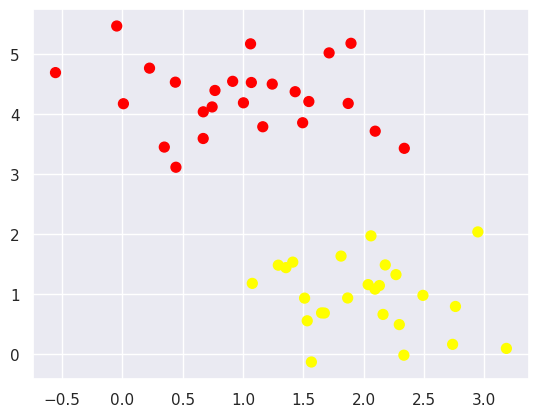

In [2]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Γίνεται εύκολα αντιληπτό ότι οι δύο κατηγορίες μπορούν να διαχωριστούν με ευθείες γραμμές. Στο παρακάτω σχήμα φαίνονται 3 τέτοιες ενδεικτικές γραμμές.
<ul>
<li><b>Ερώτηση 1:</b> Σε ποια κατηγορία θα ανήκει το test example που φαίνεται στην παρακάτω με εικόνα με το σύμβολο 'Χ' ανάλογα με την ευθεία γραμμή που θα επιλεχθεί; </li>
<li><b>Ερώτηση 2:</b> Γιατί αυτή η μέθοδος διαχωρισμού των κλάσεων ενός ταξινομητή μπορεί να οδηγήσει σε μη επιθυμητά αποτελέσματα;</li>
</ul>

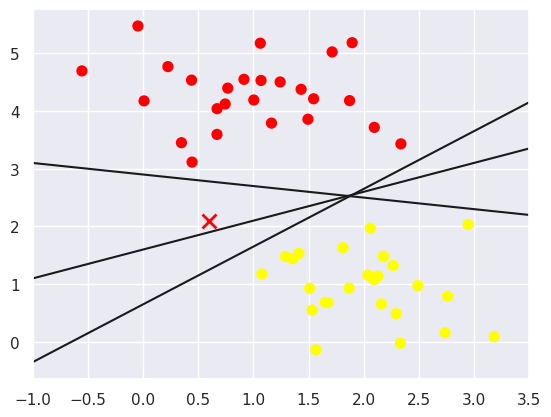

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

ΑΠΑΝΤΗΣΕΙΣ:

ΕΡΩΤΗΣΗ 1:

Τα δεδομένα μας εδω είναι 2 κλάσεις. Η μία κλάση αντιπροσωπεύτεαι από τις σφαίρες με κόκκινο χρώμα και η άλλη κλάση αντιπροσωπεύεται από τις σφαίρες με κίτρινο χρώμα.

Στο παραπάνω σχήμα υπάρχουν 3 ευθείες, οι οποίες προσπαθουν να χωρίσουν γραμμικά τα δεδομένα. Οι 2 από αυτές έχουν θετική κλίση, δηλαδή η γραφική παράσταση "ανηφορίζει", καθώς όσο αυξάνεται το Χ αυξάνεται και το Y. Η άλλη ευθεία έχει αρνητική κλίση, δηλαδή στη γραφική παράσταση "κατηφορίζει", διότι όσο αυξάνεται το Χ μειώνεται το Y.

Για να απαντήσουμε τώρα, στο ερώτημα της άσκησης πρέπει να κάνουμε μία παρατήρηση. Η παρατήρηση αυτή είναι ότι το σύμβολο Χ βρίσκεται από πάνω από τις γραφικές παραστάσεις με θετική κλίση και κάτω από τη γραφική παράσταση με αρνητική κλίση. Συνεπώς, αν η ευθεία που εφαρμόσουμε έχει θετική κλίση, τότε το Χ ανήκει στην ομάδα που αποτελείται από τις κόκκινες σφαίρες. Αν όμως, εφαρμόσουμε την ευθεία με αρνητική κλίση, τότε το σύμβολο Χ ανήκει στην ομάδα των κίτρινων σφαιριδίων.

ΕΡΩΤΗΣΗ 2:

Αυτή η μέθοδος διαχωρισμού αποτελείται από πολλαπλά υπερεπίπεδα που χωρίζουν τα δεδομένα σε 2 κλάσεις. Ωστόσο, δεν υπάρχει ομοιόμορφη κατανομή όσο αναφορά τη μέση απόσταση. Δηλαδή, κάθε ευθεία έχει διαφορετική μέση απόσταση από τα σημεία των κλάσεων. Αυτό αποτελεί πρόβλημα διότι οι ευθείες που έχουν μικρότερη μέση απόσταση  ανά σημείο από τη μία κατηγορία σε σχέση με την άλλη, έχουν τη τάση να ταξινομούν ευκολότερα νέα σημεία στην κατηγορία από την οποία απέχει τη μεγαλύτερη μέση απόσταση ανά σημείο.

Στην περίπτωση του ταξινομητή SVM το πρόβλημα αυτό επιλύεται με τον παρακάτω τρόπο: Αντί να τραβήξουμε μία γραμμή μηδενικού πλάτους ανάμεσα στις δύο κλάσεις, τραβάμε μία γραμμή με περιθώρια (margins) στις δύο πλευρές της. Η μέθοδος αυτή για τις γραμμές του προηγούμενου προβλήματος φαίνεται στην παρακάτω εικόνα.
<ul>
<li><b>Ερώτηση 3:</b> Ποιος περιορισμός ισχύει για τα περιθώρια της εκάστοτε γραμμής;</li>
<li><b>Ερώτηση 4:</b> Με ποιο κριτήριο επιλέγεται η καλύτερη γραμμή;</li>
</ul>

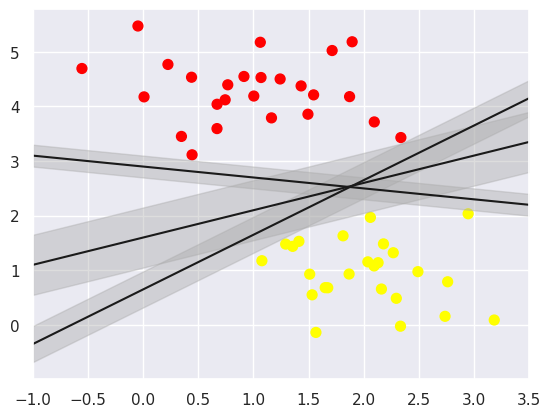

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

ΑΠΑΝΤΗΣΕΙΣ:



ΕΡΩΤΗΣΗ 3:

Το περιθώριο είναι η απόσταση μεταξύ του διανύσματος στήριξης και του υπερεπίπεδου. Ο κύριος στόχος του αλγόριθμου SVM  είναι να μεγιστοποιήσει το περιθώριο. Μεγάλο περιθώριο υποδηλώνει καλύτερη απόδοση ταξινόμησης. Ο περιορισμός που ισχύει για τα περιθώρια της εκάστοτε γραμμής είναι να ισαπέχουν από την ευθεία διαχωρισμού και να είναι παράλληλες προς αυτήν.

Διάνυσμα στήριξης είναι εκείνα τα σημεία τα οποία καθορίζουν τη βέλτιστη διαχωριστική ευθεία, η οποία είναι ανεξάρτητη από όλα τα υπόλοιπα σημεία του δείγματος. Στο παραπάνω σχήμα δεν φαίνεται ποια είναι, αλλά στη συνέχεια του notebook γίνονται αισθητά.

ΕΡΩΤΗΣΗ 4:

Ο αλγόριθμος SVM έχει ως στόχο να βρίσκει το βέλτιστο υπερεπίπεδο σε έναν χώρο Ν-διαστασεων που μπορεί να διαχωρίσει τα σημεία δεδομένων σε διαφορετικές κλάσεις. Το υπερεπίπεδο προσπαθεί το περιθώριο μεταξύ των πλησιέστερων σημείων διαφορετικών κλάσεων να είναι όσο το δυνατό μέγιστο. Συνεπώς, επιλέγεται εκείνη η γραμμή που απέχει τη μεγαλύτερη απόσταση από τα πλησιέστερα σε αυτήν  σημεία των διαφορετικών κλάσεων. Με βάση το παραπάνω σχήμα, η ιδανική γραμμη είναι εκείνη που έχει θετική κλίση και ξεκινάει από το σημείο (-1,1). Φυσικά το -1 αντιπροσωπεύει τον οριζόντιο άξονα και το 1 τον κάθετο άξονα.

### Εκπαίδευση του Μοντέλου

Χρησιμοποιώντας το πακέτο Scikit-Learn θα εκπαιδεύσουμε τον αλγόριθμο SVM πάνω στα δεδομένα του προηγούμενου προβλήματος, χρησιμοποιώντας γραμμικό πυρήνα.

In [5]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Με την παρακάτω μέθοδο θα εμφανιστεί στο σχήμα που ακολουθεί η βέλτιστη γραμμή διαχωρισμού των δύο κατηγοριών, καθώς και τα περιθώριά της. Τα training examples που ακουμπούν πάνω στα όρια ονομάζονται Support Vectors.

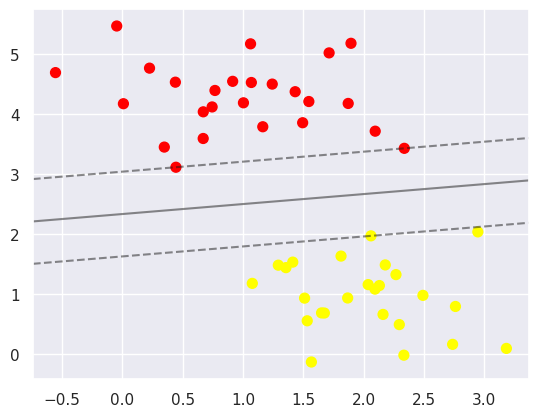

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Στο ακόλουθο σχήμα, η διαδικασία επαναλαμβάνεται για δύο datasets που περιλαμβάνουν 60 και 120 training examples αντίστοιχα.
<ul>
<li><b>Ερώτηση 5:</b> Τι παρατηρείτε σχετικά με τη βέλτιστη γραμμή που διαχωρίζει τις δύο κατηγορίες και τα περιθώριά της;</li>
<li><b>Ερώτηση 6:</b>Τι αρκεί να κάνει ο αλγόριθμος για να ταξινομήσει νέα δεδομένα που θα λάβει στην είσοδό του;</li>
</ul>

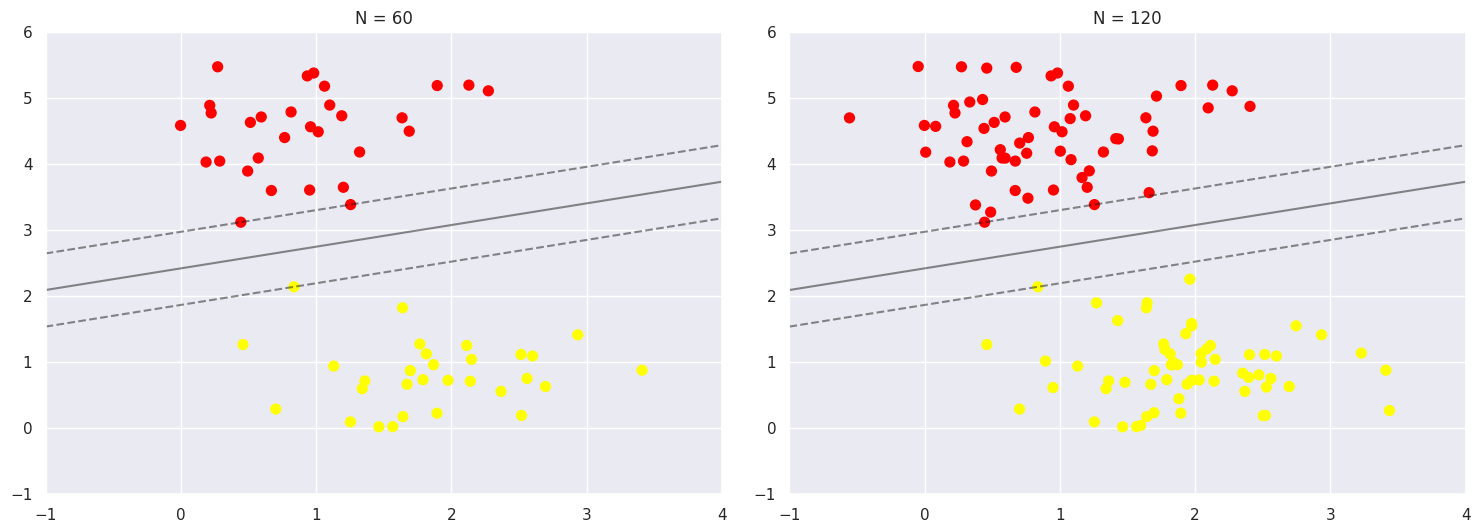

In [7]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

ΑΠΑΝΤΗΣΕΙΣ:

ΕΡΩΤΗΜΑ 5:

Αυτό που παρατηρώ για τη βέλτιστη γραμμή είναι ότι ισαπέχει από τα κοντινόετρα σημεία των 2 κλάσεων. Όπως αναφέραμε και παραπάνω, υπάρχουν 2 κλάσεις. Η μία κλάση περιλαμβάνει τα σημεία με κόκκινο χρώμα και η άλλη ομάδα περιλαμβάνει τα σημεία με κίτρινο χρώμα.Συνεπώς, το κοντινότερο σημείο της κόκκινης ομάδας προς τη βέλτιστη γραμμή απέχει ακριβώς την ίδια απόσταση από το αντίστοιχο κοντινότερο σημείο της κίτρινης ομάδας.

Ακριβώς το ίδιο ισχύει όσο αναφορά τα περιθώριά ανάμεσα στα κοντινότερα σημεία των ομάδων και τη βέλτιστη γραμμή. Δηλαδή, τα περιθώρια των 2 ομάδων προς τη βέλτιστη γραμμή έχουν ακριβώς την ίδια απόσταση.

Για την επιβεβαίωση των παραπάνω συμπερασμάτων, βοηθάνε και τα διανύσματα στήριξης που είναι εκείνα τα σημεία τα οποία καθορίζουν τη βέλτιστη διαχωριστική ευθεία (και κατ' επέκταση τις περιθωριακές ευθείες) η οποία είναι ανεξάρτητη από όλα τα υπόλοιπα σημεία του δείγματος.

ΕΡΩΤΗΣΗ 6:

Κατά την εκπαίδευση, ο αλγόριθμος SVM εκπαιδεύεται σε ένα σύνολο εκπαίδευσης που περιλαμβάνει δεδομένα εισόδου και τις αντίστοιχες ετικέτες κλάσης. O αλγόριθμος εντοπίζει τα υποστηρικτικά διανύσματα, δηλαδή τα δεδομένα εκπαίδευσης που βρίσκονται στα όρια των περιοχών απόφασης.Με βάση τα υποστηρικτικά διανύσματα, ο αλγόριθμος υπολογίζει τους συντελεστές υποστήριξης (ή απλώς "βάρη") για κάθε ένα από αυτά. Όταν λάβει νέα δεδομένα εισόδου, ο αλγόριθμος SVM υπολογίζει την κλάση τους με βάση τις αποφάσεις που έχει λάβει κατά τη διάρκεια της εκπαίδευσης και τα συντελεστές υποστήριξης που έχει υπολογίσει.

Η γραμμική εξίσωση για την ταξινόμηση είναι wx+b=0, όπου w->τα βάρη, x δεδομένο εισόδου και b-> σταθερά. Έστω f(x)=wx+b=0. Δηλάδη, f(x)=0. Παραγωγίζοντας, έχουμε f'(x)=w. Συνεπως, αν τα βάρη είναι θετικά (>0), τότε τα δεδομένα εισόδου ταξινομούνται στην ομάδα που βρίσκεται πάνω από το υπερεπίπεδο, δηλαδή στη κόκκινη ομάδα. Αν τα βάρη είναι αρνητικά, τότε τα δεδομένα εισόδου ταξινομούνται στην ομάδα που βρίσκεται κάτω από το υπερεπίπεδο , δηλαδή στη κίτρινη ομάδα. Αν τα βάρη είναι 0, τότε η ταξινόμηση γίνεται τυχαία. Ο αλγόριθμος SVM μπορεί να αγνοεί ακραίες τιμές (ατυπικές τιμές) και να βρίσκει το καλύτερο υπερεπίπεδο.

Σε αυτό το σημείο θα ήθελα να αναφέρω, ότι η ευθεία ταξινόμησης-βέλτιστη γραμμή είναι συνεχής και αύξουσα και συνεπώς έχουμε αντιστοιχία στοιχείων 1-1. Αυτός είναι και ο λόγος που έχουμε τη παραπάνω μορφή ταξινομήσης εισόδου νέων στοιχείων.  

### Μη Γραμμικά Διαχωρίσιμες Κατηγορίες: Kernel SVM

Στην περίπτωση που οι κατηγορίες του προβλήματος δεν είναι γραμμικά διαχωρίσιμες, ο αλγόριθμος SVM χρησιμοποιεί μη γραμμικούς πυρήνες (kernels) για να προβάλει τα δεδομένα εκπαίδευσης σε μεγαλύτερη διάσταση όπου μπορεί να τα καταστήσει γραμμικά διαχωρίσιμα. Μία τέτοια περίπτωση δεδομένων εκπαίδευσης παρουσιάζεται στο επόμενο σχήμα.

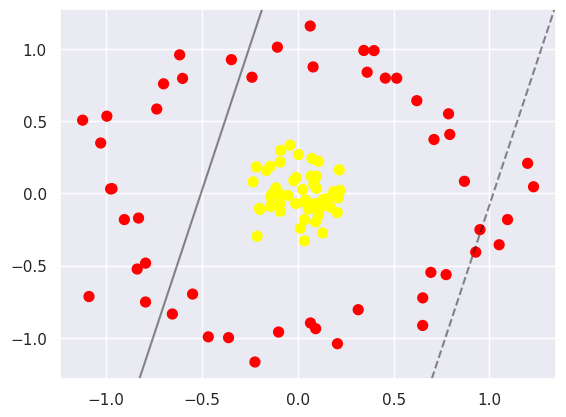

In [8]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Είναι φανερό ότι τα δεδομένα εκπαίδευσης δεν μπορούν να διαχωριστούν γραμμικά. Στο επόμενο σχήμα φαίνεται η προβολή τους στις τρεις διαστάσεις με τη χρήση ενός μη γραμμικού πυρήνα.
<ul>
<li><b>Ερώτηση 7:</b> Τι είδους πυρήνας χρησιμοποιήθηκε;</li>
<li><b>Ερώτηση 8:</b> Δώστε ένα παράδειγμα γραμμικού ορίου που θα μπορούσε να διαχωρίσει τις δύο κατηγορίες.</li>
</ul>

ΑΠΑΝΤΗΣΕΙΣ:


ΕΡΩΤΗΣΗ 7:

Ο πυρήνας είναι η μαθηματική συνάρτηση, η οποία χρησιμοποιείται στο SVM για να αντιστοιχίσει τα αρχικά σημεία δεδομένων εισόδου σε χώρους χαρακτηριστικών υψηλών διαστάσεων, έτσι ώστε το υπερεπίπεδο να μπορεί να εντοπιστεί εύκολα ακόμα κι αν τα σημεία δεδομένων δεν είναι γραμμικά διαχωρισμένα στην αρχική είσοδο χώρος.Μερικές από τις κοινές συναρτήσεις του πυρήνα είναι η γραμμική, πολυωνυμική, ακτινική συνάρτηση βάσης (RBF) και σιγμοειδές.

Εδώ πρόκειται για έναν γραμμικό πυρήνα. Ο πυρήνας γραμμικής μορφής είναι απλά μια εσωτερική γινόμενη συνάρτηση, η οποία πραγματοποιεί την εξέταση των δεδομένων σε έναν χώρο υψηλότερων διαστάσεων και στη συνέχεια εκτελεί την ταξινόμηση χρησιμοποιώντας ένα γραμμικό όριο σε αυτόν τον χώρο.

Σε αυτή την περίπτωση, η SVC χρησιμοποιείται με τον πυρήνα kernel='linear', ο οποίος επιβάλλει ένα γραμμικό όριο διαχωρισμού μεταξύ των κατηγοριών των δεδομένων.

Η συνάρτηση make_circles δημιουργεί ένα σύνολο δεδομένων που αποτελείται από δύο διακριτές κυκλικές κατηγορίες, οι οποίες δεν είναι γραμμικά διαχωρίσιμες στον δύο-διάστατο χώρο. Ωστόσο, η εσωτερική γραμμική συνάρτηση πυρήνα επιτρέπει στην SVC να εκτελέσει μια γραμμική ταξινόμηση σε έναν υψηλότερης διάστασης χώρο όπου οι κατηγορίες γίνονται γραμμικά διαχωρίσιμες.

Αντί να πραγματοποιεί τη μετατροπή σε υψηλότερες διαστάσεις, ο πυρήνας linear απλά χρησιμοποιεί μια γραμμική συνάρτηση πυρήνα για να εξετάσει τα δεδομένα στον αρχικό δισδιάστατο χώρο.

ΕΡΩΤΗΣΗ 8:

Το μη γραμμικό SVM μπορεί να χρησιμοποιηθεί για την ταξινόμηση δεδομένων όταν δεν μπορεί να διαχωριστεί σε δύο κατηγορίες με ευθεία γραμμή. Χρησιμοποιώντας συναρτήσεις πυρήνα, τα μη γραμμικά SVM μπορούν να χειριστούν μη γραμμικά διαχωρίσιμα δεδομένα. Τα αρχικά δεδομένα εισόδου μετασχηματίζονται από αυτές τις λειτουργίες του πυρήνα σε έναν χώρο χαρακτηριστικών υψηλότερης διάστασης, όπου τα σημεία δεδομένων μπορούν να διαχωριστούν γραμμικά. Ένα γραμμικό SVM χρησιμοποιείται για τον εντοπισμό ενός μη γραμμικού ορίου απόφασης σε αυτόν τον τροποποιημένο χώρο.

Στη συγκεκριμένη περίπτωση, μπορούμε να αυξήσουμε τις διαστάσεις της γραφικής παράστασης.Στη παραπάνω εικόνα, έχουμε μια δισδιάστατη απείκονιση των δεδομένων, τα οποία όμως επειδή δεν είναι γραμμικά κατανεμημένα δεν μπορεί να γινεί εύκολα η ταξινομήση. Για το λόγο αυτό, θα απεικονίσουμε τη γραφική παράσταση σε 3σδιάστατη μορφή, όπως φαίνεται στο παρακάτω σχήμα. Έχοντας τα δεδομένα μας σε 3σδιάστατη μορφή μπορούμε να κάνουμε πολύ πιο εύκολα την ταξινόμηση.

In [9]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

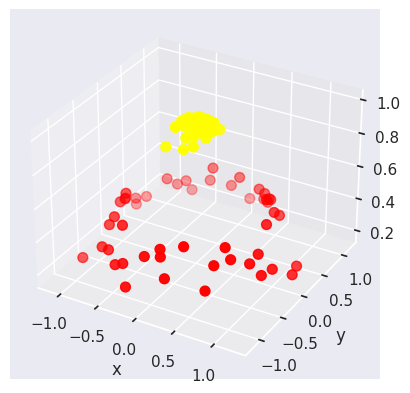

In [10]:
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

Η εύρεση του πυρήνα που μπορεί να διαχωρίσει με τον καλύτερο τρόπο τα δεδομένα απαιτεί, συνήθως, πολλούς υπολογισμούς.
<ul>
<li><b>Ερώτηση 9:</b> Ποια μέθοδος μπορεί να βοηθήσει σε αυτό και πώς; (hint: <a href="https://en.wikipedia.org/wiki/Kernel_trick">Kernel Trick</a>)</li>
</ul>

In [11]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

ΑΠΑΝΤΗΣΗ:

ΕΡΩΤΗΣΗ 9:

Η μέθοδος που μπορεί να χρησιμοποιηθεί και να βοηθήσει στην ταξινόμηση μη γραμμικών δεδομένων είναι η χρήση γκαουσιανού πυρηνά. Ο πυρήνας αυτός χρησιμοποιεί την τεχνικη Radial Basis Function.


Η χρήση γκαουσιανού πυρήνα (RBF kernel) στον αλγόριθμο υποστήριξης διανυσμάτων (SVM) βοηθά στην ταξινόμηση μη γραμμικών δεδομένων με τον ακόλουθο τρόπο:

Μετασχηματίζει τα δεδομένα από τον αρχικό χώρο χαρακτηριστικών σε έναν χώρο υψηλότερων διαστάσεων. Σε αυτόν τον νέο χώρο, τα δεδομένα μπορεί να είναι πιο διαχωρίσιμα γραμμικά. Ωστόσο,ακόμη και αν τα δεδομένα δεν είναι γραμμικά διαχωρίσιμα στον αρχικό χώρο χαρακτηριστικών, ο γκαουσιανός πυρήνας μπορεί να δημιουργήσει μη γραμμικές αποφάσεις διαχωρισμού στον νέο χώρο υψηλότερων διαστάσεων.

Η παράμετρος C στο SVM επιτρέπει την προσαρμογή της πολυπλοκότητας του μοντέλου. Ένα μεγαλύτερο C επιτρέπει στο μοντέλο να προσαρμοστεί ακόμη και σε πιο περίπλοκα σύνολα δεδομένων, ενώ ένα μικρότερο C μπορεί να αποτρέψει την υπερπροσαρμογή.